# Esercizio 7.1/7.2



Nella prima parte dell'esercizio 7 è richiesto di calcolare attraverso l'algoritmo di metropolis pressione ed energia potenziale per particella di un sistema composto da 108 particelle per diverse configurazioni. Fissate densità, temperatura e raggio di cut-off per lo stato solido, liquido e gassoso sono state effettuate le simulazioni da cui si sono ricavate energia potenziale per particella e pressione.
Di seguito sono riportati i grafici dei risultati ottenuti, ovvero dei valori istantanei per 100000 passi.
Come si può notare dai grafici le quantità di interesse giungono rapidamente all'equilibrio.

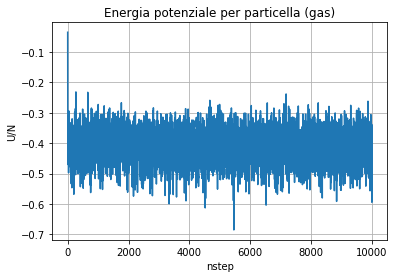

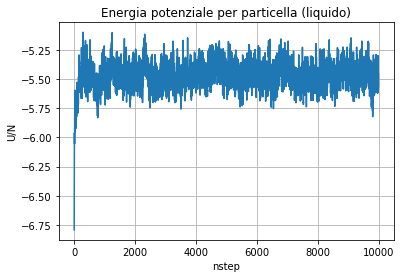

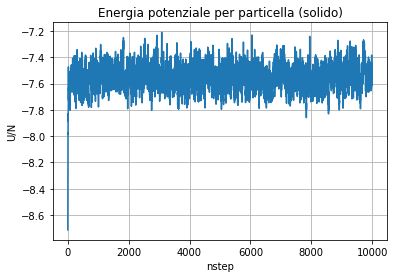

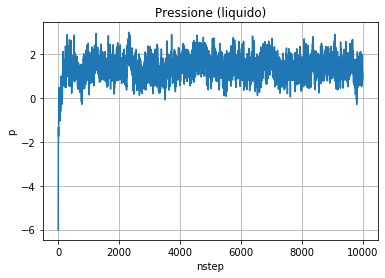

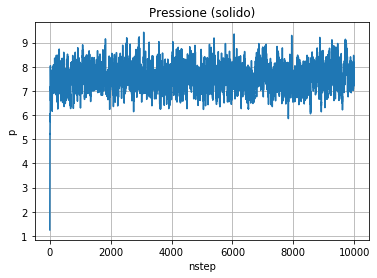

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

Gas=np.loadtxt("pot_gas.instant")
Gas_=np.loadtxt("pot_gas.instant",max_rows=10000)
d= int(len(Gas))
d_ = int(len(Gas_))

plt.plot(np.arange(d_),Gas_)
plt.xlabel("nstep")
plt.ylabel("U/N")
plt.title("Energia potenziale per particella (gas)")
plt.grid(True)
plt.show()
##

Liq=np.loadtxt("pot_liquid.instant")
Liq_=np.loadtxt("pot_liquid.instant",max_rows=10000)
d= int(len(Liq))
d_ = int(len(Liq_))

plt.plot(np.arange(d_),Liq_)
plt.xlabel("nstep")
plt.ylabel("U/N")
plt.title("Energia potenziale per particella (liquido)")
plt.grid(True)
plt.show()
##

Sol=np.loadtxt("pot_solid.instant")
Sol_=np.loadtxt("pot_solid.instant",max_rows=10000)
d= int(len(Sol))
d_ = int(len(Sol_))

plt.plot(np.arange(d_),Sol_)
plt.xlabel("nstep")
plt.ylabel("U/N")
plt.title("Energia potenziale per particella (solido)")
plt.grid(True)
plt.show()

#########################

Gasp=np.loadtxt("pres_gas.instant")
Gasp_=np.loadtxt("pres_gas.instant",max_rows=10000)
d= int(len(Gasp))
d_ = int(len(Gasp_))

plt.plot(np.arange(d_),Gasp_)
plt.xlabel("nstep")
plt.ylabel("p")
plt.title("Pressione (gas)")
plt.grid(True)
plt.show()
##

Liqp=np.loadtxt("pres_liquid.instant")
Liqp_=np.loadtxt("pres_liquid.instant",max_rows=10000)
d= int(len(Liqp))
d_ = int(len(Liqp_))

plt.plot(np.arange(d_),Liqp_)
plt.xlabel("nstep")
plt.ylabel("p")
plt.title("Pressione (liquido)")
plt.grid(True)
plt.show()
##

Solp=np.loadtxt("pres_solid.instant")
Solp_=np.loadtxt("pres_solid.instant",max_rows=10000)
d= int(len(Solp))
d_ = int(len(Solp_))

plt.plot(np.arange(d_),Solp_)
plt.xlabel("nstep")
plt.ylabel("p")
plt.title("Pressione (solido)")
plt.grid(True)
plt.show()




Successivamente si richiede di ricavare la funzione di autocorrelazione; in questo modo si ha una stima di quanto i blocchi debbano essere larghi. Inoltre si può calcolare il tempo di autocorrelazione $\tau_c$, ovvero il tempo in cui l'autocorrelazione crolla a un valore prossimo allo 0. Dopo questo tempo $\tau_c$ si ha che le misure siano scorrelate tra di loro. Nel nostro caso i tempi sono sostituiti con il numero di step.


100000


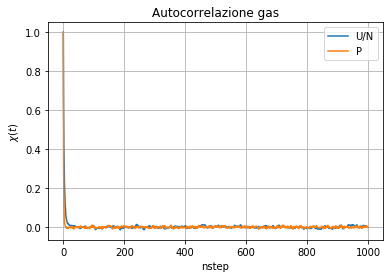

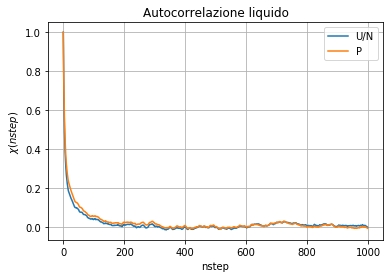

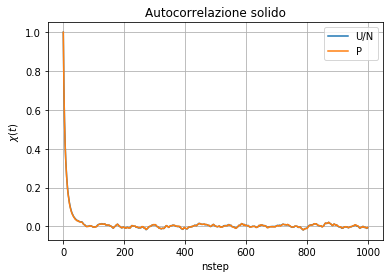

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
    
Gas_u=np.loadtxt("pot_gas.instant", max_rows=100000)
Liq_u=np.loadtxt("pot_liquid.instant",max_rows=100000)
Sol_u=np.loadtxt("pot_solid.instant",max_rows=100000)
Gas_p=np.loadtxt("pres_gas.instant",max_rows=100000)
Liq_p=np.loadtxt("pres_liquid.instant",max_rows=100000)
Sol_p=np.loadtxt("pres_solid.instant",max_rows=100000)

d=int(len(Gas_u))
print(d)

    
def autocorrelazione(x,d,dev,tc):
    global p
    global s
    global s_2
    p=0
    s=0
    s_2=0
    
    for i in range(d-tc):
        p+=x[i]*x[i+tc]
        s+=x[i]
        s_2+=x[i+tc]
    
    p/=(d-tc)
    s/=(d-tc)
    s_2/=(d-tc)

    return (p-s*s_2)/dev

##

def dev_std(x,d): 
    global s
    global s_2
    s=0
    s_2=0
    for i in range(d):
        s+=x[i]
        s_2+=pow(x[i],2)
    
    return (s_2/d-pow(s/d,2))


##########


nstep=np.arange(1000)



d_gas_u=dev_std(Gas_u,d)
d_gas_p=dev_std(Gas_p,d)

corr_gas_u=np.zeros(1000)
corr_gas_p=np.zeros(1000)

for i in range(1000):
    corr_u[i]=autocorrelazione(Gas_u,d,d_gas_u,i)
    corr_p[i]=autocorrelazione(Gas_p,d,d_gas_p,i)
    
plt.plot(nstep,corr_u,label="U/N")
plt.plot(nstep,corr_p,label="P")
plt.xlabel("nstep")
plt.ylabel("$\chi (t)$")
plt.title("Autocorrelazione gas")
plt.legend()
plt.grid(True)
plt.show()

d_liq_u=dev_std(Liq_u,d)
d_liq_p=dev_std(Liq_p,d)

corr_liq_u=np.zeros(1000)
corr_liq_p=np.zeros(1000)

for i in range(1000):
    corr_ul[i]=autocorrelazione(Liq_u,d,d_liq_u,i)
    corr_pl[i]=autocorrelazione(Liq_p,d,d_liq_p,i)


plt.plot(nstep,corr_ul,label="U/N")
plt.plot(nstep,corr_pl,label="P")
plt.xlabel("nstep")
plt.ylabel("$\chi (nstep)$")
plt.title("Autocorrelazione liquido")
plt.legend()
plt.grid(True)
plt.show()

d_sol_u=dev_std(Sol_u,d)
d_sol_p=dev_std(Sol_p,d)

corr_sol_u=np.zeros(1000)
corr_sol_p=np.zeros(1000)

for i in range(1000):
    corr_us[i]=autocorrelazione(Sol_u,d,d_sol_u,i)
    corr_ps[i]=autocorrelazione(Sol_p,d,d_sol_p,i)

plt.plot(nstep,corr_us,label="U/N")
plt.plot(nstep,corr_ps,label="P")
plt.xlabel("nstep")
plt.ylabel("$\chi (t)$")
plt.title("Autocorrelazione solido")
plt.legend()
plt.grid(True)
plt.show()
      

La funzione di autocorrelazione è la seguente:
$$\chi(t)=\frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}x(t')x(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}(x(t'))\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}(x(t'+t))}{\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}x(t')^2-(\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}x(t'))^2}$$

L'autocorrelazione $\chi(t)$ segua un andamento esponenziale (come previsto), ed entro un centinaio di step il valore crolla a 0. Dunque prendiamo i blocchi larghi 250 step per essere sicuri di avere delle misure scorrelate.
Nella seconda parte dell'esercizio è richiesto di stimare l'errore statistico della pressione e del potenziale in funzione della larghezza dei blocchi (da 10 a 5000). I grafici sono riporati di seguito.

Per controprova studio l'andamento dell'errore statistico della media a blocchi considerando blocchi di larghezza L compresa tra 10 e 5000. Considero per il calcolo solo le L che appartengono all'insieme dei divisori del numero di step M (lunghezza del vettore), in modo da ottenere un numero di blocchi N intero.
In questo caso, per equilibrare il sistema, tolgo i primi 15000 punti, in modo da avere abbastanza L per osservare un andamento definito dell'errore statistico.


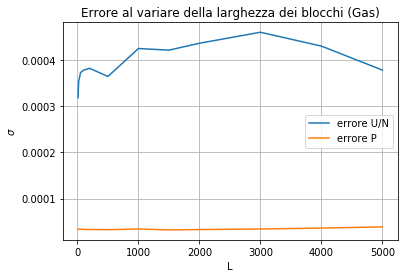

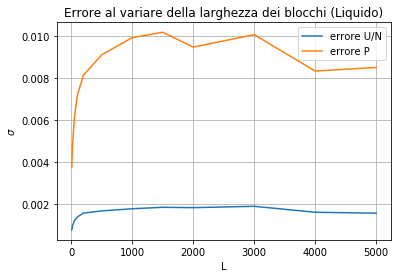

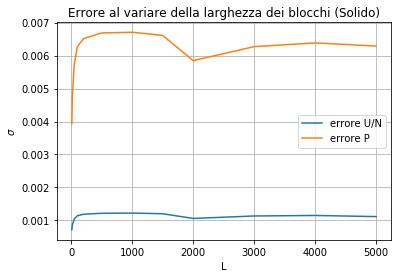

In [33]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
        
Gas_u=np.loadtxt("pot_gas.instant", max_rows=100000)
Liq_u=np.loadtxt("pot_liquid.instant",max_rows=100000)
Sol_u=np.loadtxt("pot_solid.instant",max_rows=100000)
Gas_p=np.loadtxt("pres_gas.instant",max_rows=100000)
Liq_p=np.loadtxt("pres_liquid.instant",max_rows=100000)
Sol_p=np.loadtxt("pres_solid.instant",max_rows=100000)

M= 100000

def dev_std_blocchi(M,l,x):
    N=int(M/l)
    m=0
    m2=0
    media=np.zeros(N)
    media2=np.zeros(N)
    for i in range(N):                
        for j in range(l):
            media[i]+=x[i*l+j]
        media[i]/=l
        media2[i]=(media[i])**2
    for k in range(N):               
        m+=media[k]
        m2+=media2[k]
    m/=N
    m2/=N
    return math.sqrt((m2-pow(m,2))/(N-1)) 


cont = 12
#creo vettori 
L=np.zeros(cont)
d_gas_u=np.zeros(cont)
d_gas_p=np.zeros(cont)
d_liq_u=np.zeros(cont)
d_liq_p=np.zeros(cont)
d_sol_u=np.zeros(cont)
d_sol_p=np.zeros(cont)

          
L = np.array([10,20,50,100,200,500,1000,1500,2000,3000,4000,5000])

for i in range(cont):
        l=int(L[i])
        d_gas_u[i]=dev_std_blocchi(M,l,Gas_u)
        d_gas_p[i]=dev_std_blocchi(M,l,Gas_p)
        d_liq_u[i]=dev_std_blocchi(M,l,Liq_u)
        d_liq_p[i]=dev_std_blocchi(M,l,Liq_p)
        d_sol_u[i]=dev_std_blocchi(M,l,Sol_u)
        d_sol_p[i]=dev_std_blocchi(M,l,Sol_p)

#GAS
plt.plot(L,d_gas_u,label="U/N")
plt.plot(L,d_gas_p,label="P")
plt.xlabel("L")
plt.ylabel("$\sigma$")
plt.title("Errore al variare della larghezza dei blocchi (Gas)")
plt.legend()
plt.grid(True)
plt.show()

#LIQUIDO
plt.plot(L,d_liq_u,label="U/N")
plt.plot(L,d_liq_p,label="P")
plt.xlabel("L")
plt.ylabel("$\sigma$")
plt.title("Errore al variare della larghezza dei blocchi (Liquido)")
plt.legend()
plt.grid(True)
plt.show()

#SOLIDO
plt.plot(L,d_sol_u,label="U/N")
plt.plot(L,d_sol_p,label="P")
plt.xlabel("L")
plt.ylabel("$\sigma$")
plt.title("Errore al variare della larghezza dei blocchi (Solido)")
plt.legend()
plt.grid(True)
plt.show()

L'errore per larghezze piccole dei blocchi (da 10 a circa un centinaio) abbia un'andamento crescente finché oltrepassato il tempo di autocorrelazione si stabilizza; questo perché per misure strettamente correlate l'errore è minore rispetto a misure scorrelate. Da qui deduciamo che la grandezza ottimale dei blocchi non debba essere inferiore al centinaio di step, mentre sopra il migliaio l'errore tende a descescere leggermente.
